In [1]:
import pandas as pd 
import numpy as np
import missingno as msno
import seaborn as sns
import matplotlib.pyplot as plt
# from sklearn import linear_model

In [34]:
# The CSV file is too big to be read at once.
# It is the dataset from the website compressed in gz.

# (2_686_036 rows, 196 columns) found with 'wc - l' (bash)
# and opening only 5 rows.
data_en = pd.read_csv('./csv_files/data.csv', sep='\t', nrows=5)
data_en

,code,url,creator,created_t,created_datetime,last_modified_t,last_modified_datetime,product_name,abbreviated_product_name,generic_name,...,carbon-footprint-from-meat-or-fish_100g,nutrition-score-fr_100g,nutrition-score-uk_100g,glycemic-index_100g,water-hardness_100g,choline_100g,phylloquinone_100g,beta-glucan_100g,inositol_100g,carnitine_100g
0,225,http://world-en.openfoodfacts.org/product/0000...,nutrinet-sante,1623855208,2021-06-16T14:53:28Z,1623855209,2021-06-16T14:53:29Z,jeunes pousses,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,207025004,http://world-en.openfoodfacts.org/product/0000...,kiliweb,1656948610,2022-07-04T15:30:10Z,1656948613,2022-07-04T15:30:13Z,Andrè,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,3429145,http://world-en.openfoodfacts.org/product/0000...,kiliweb,1630483911,2021-09-01T08:11:51Z,1656488106,2022-06-29T07:35:06Z,L.casei,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,26772226,http://world-en.openfoodfacts.org/product/0000...,kiliweb,1654250311,2022-06-03T09:58:31Z,1654270474,2022-06-03T15:34:34Z,Skyr,NaN,NaN,...,NaN,-5.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,17,http://world-en.openfoodfacts.org/product/0000...,kiliweb,1529059080,2018-06-15T10:38:00Z,1561463718,2019-06-25T11:55:18Z,Vitória crackers,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


I want to create a very short list of interesting features found in the [features description](https://world.openfoodfacts.org/data/data-fields.txt) to start with.

- code
- product_name
- categories
- nutrition_grade_fr
- nutrition-score-fr_100g
- main_category
- main_category_fr



In [28]:
features = ['code',
            'product_name',
            'categories',
            'main_category',
            'main_category_fr',
            'nutrition_grade_fr',
            'nutrition-score-fr_100g',
            ]

# selecting only those columns on the first 200_000 products.
data_sel = pd.read_csv('./csv_files/data.csv',
                   sep='\t',
                   usecols=features,
                   nrows=2e5)


ValueError: Usecols do not match columns, columns expected but not found: ['nutrition_grade_fr', 'main_category_fr']

In [35]:
# feature_fr seem to not be included. Let's try with another CSV file
# provided in the OpenClassrooms website.
data_fr = pd.read_csv('./csv_files/fr.openfoodfacts.org.products.csv',
                      sep='\t',
                      nrows=5)


In [36]:
data_fr.shape

(5, 162)

In [40]:
# the features list is not the same. (196 != 162)
features_only_fr = data_fr.columns.difference(data_en.columns)
print(features_only_fr)
print(len(features_only_fr))

Index(['additives_fr', 'allergens_fr', 'alpha-linolenic-acid_100g',
       'arachidic-acid_100g', 'arachidonic-acid_100g', 'behenic-acid_100g',
       'butyric-acid_100g', 'capric-acid_100g', 'caproic-acid_100g',
       'caprylic-acid_100g', 'categories_fr', 'cerotic-acid_100g',
       'countries_fr', 'dihomo-gamma-linolenic-acid_100g',
       'docosahexaenoic-acid_100g', 'eicosapentaenoic-acid_100g',
       'elaidic-acid_100g', 'erucic-acid_100g', 'fructose_100g',
       'gamma-linolenic-acid_100g', 'glucose_100g', 'gondoic-acid_100g',
       'ingredients_from_palm_oil', 'ingredients_from_palm_oil_n',
       'ingredients_from_palm_oil_tags',
       'ingredients_that_may_be_from_palm_oil',
       'ingredients_that_may_be_from_palm_oil_n',
       'ingredients_that_may_be_from_palm_oil_tags', 'labels_fr',
       'lactose_100g', 'lauric-acid_100g', 'lignoceric-acid_100g',
       'linoleic-acid_100g', 'main_category_fr', 'maltodextrins_100g',
       'maltose_100g', 'mead-acid_100g', 'melis

In [41]:
features_only_en = data_en.columns.difference(data_fr.columns)
print(features_only_en)
print(len(features_only_en))

Index(['-alpha-linolenic-acid_100g', '-arachidic-acid_100g',
       '-arachidonic-acid_100g', '-behenic-acid_100g', '-butyric-acid_100g',
       '-capric-acid_100g', '-caproic-acid_100g', '-caprylic-acid_100g',
       '-cerotic-acid_100g', '-dihomo-gamma-linolenic-acid_100g',
       '-docosahexaenoic-acid_100g', '-eicosapentaenoic-acid_100g',
       '-elaidic-acid_100g', '-erucic-acid_100g', '-fructose_100g',
       '-gamma-linolenic-acid_100g', '-glucose_100g', '-gondoic-acid_100g',
       '-lactose_100g', '-lauric-acid_100g', '-lignoceric-acid_100g',
       '-linoleic-acid_100g', '-maltodextrins_100g', '-maltose_100g',
       '-mead-acid_100g', '-melissic-acid_100g', '-montanic-acid_100g',
       '-myristic-acid_100g', '-nervonic-acid_100g', '-oleic-acid_100g',
       '-palmitic-acid_100g', '-stearic-acid_100g', '-sucrose_100g',
       'abbreviated_product_name', 'additives_en', 'allergens_en',
       'beta-glucan_100g', 'brand_owner',
       'carbon-footprint-from-meat-or-fish_100g'

In [45]:
# More features are common. Need to strip for matching.
features_mod = {feat: feat.lstrip(' -') for feat in data_en.columns}

In [46]:
data_en.rename(columns=features_mod, inplace=True)

In [47]:
features_only_en = data_en.columns.difference(data_fr.columns)
print(features_only_en)
print(len(features_only_en))

Index(['abbreviated_product_name', 'additives_en', 'allergens_en',
       'beta-glucan_100g', 'brand_owner',
       'carbon-footprint-from-meat-or-fish_100g', 'carnitine_100g',
       'categories_en', 'choline_100g', 'completeness', 'countries_en',
       'data_quality_errors_tags', 'ecoscore_grade', 'ecoscore_score',
       'energy-kcal_100g', 'energy-kj_100g', 'food_groups', 'food_groups_en',
       'food_groups_tags', 'fruits-vegetables-nuts-dried_100g',
       'fruits-vegetables-nuts-estimate-from-ingredients_100g',
       'fruits-vegetables-nuts-estimate_100g', 'image_ingredients_small_url',
       'image_ingredients_url', 'image_nutrition_small_url',
       'image_nutrition_url', 'ingredients_analysis_tags', 'ingredients_tags',
       'inositol_100g', 'insoluble-fiber_100g', 'labels_en',
       'last_image_datetime', 'last_image_t', 'main_category_en', 'nova_group',
       'nutrient_levels_tags', 'nutriscore_grade', 'nutriscore_score',
       'origins_en', 'owner', 'packaging_en'

In [48]:
features_only_fr = data_fr.columns.difference(data_en.columns)
print(features_only_fr)
print(len(features_only_fr))

Index(['additives_fr', 'allergens_fr', 'categories_fr', 'countries_fr',
       'ingredients_from_palm_oil', 'ingredients_from_palm_oil_n',
       'ingredients_from_palm_oil_tags',
       'ingredients_that_may_be_from_palm_oil',
       'ingredients_that_may_be_from_palm_oil_n',
       'ingredients_that_may_be_from_palm_oil_tags', 'labels_fr',
       'main_category_fr', 'nutrition_grade_fr', 'nutrition_grade_uk',
       'states_fr', 'traces_fr'],
      dtype='object')
16


In [49]:
50 - 16 == 196 - 162

True

In [52]:
common_features = data_en.columns.intersection(data_fr.columns)
print(len(common_features))

146


In [56]:
# Are those really common, or can I find information in one CSV file
# and not in the other?
categories_en = pd.read_csv('./csv_files/data.csv',
                            usecols=['code','categories'],
                            sep='\t')
categories_fr = pd.read_csv('./csv_files/fr.openfoodfacts.org.products.csv',
                            usecols=['code','categories'],
                            sep='\t')

/tmp/ipykernel_4402/1746534333.py:3: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  categories_en = pd.read_csv('./csv_files/data.csv',
/tmp/ipykernel_4402/1746534333.py:6: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  categories_fr = pd.read_csv('./csv_files/fr.openfoodfacts.org.products.csv',


In [55]:
print(categories_en.shape)
print(categories_fr.shape)

(2686036, 1)
(320772, 1)


In [60]:
both_categories = categories_en.join(categories_fr.set_index('code'),
                                     on='code',
                                     how='outer',
                                     rsuffix='_fr')

In [61]:
both_categories.shape

(2758010, 3)

In [62]:
both_categories.columns

Index(['code', 'categories', 'categories_fr'], dtype='object')

In [64]:
diff = (both_categories.
        loc[both_categories.categories 
            != both_categories.categories_fr])
diff.shape

(2757074, 3)

In [65]:
diff.head()

,code,categories,categories_fr
0.0,00000000000000225,NaN,NaN
1.0,0000000000000207025004,NaN,NaN
2.0,00000000000003429145,NaN,NaN
3.0,00000000000026772226,"Produits laitiers, Desserts, Produits fermenté...",NaN
4.0,0000000000017,NaN,NaN


<AxesSubplot: >

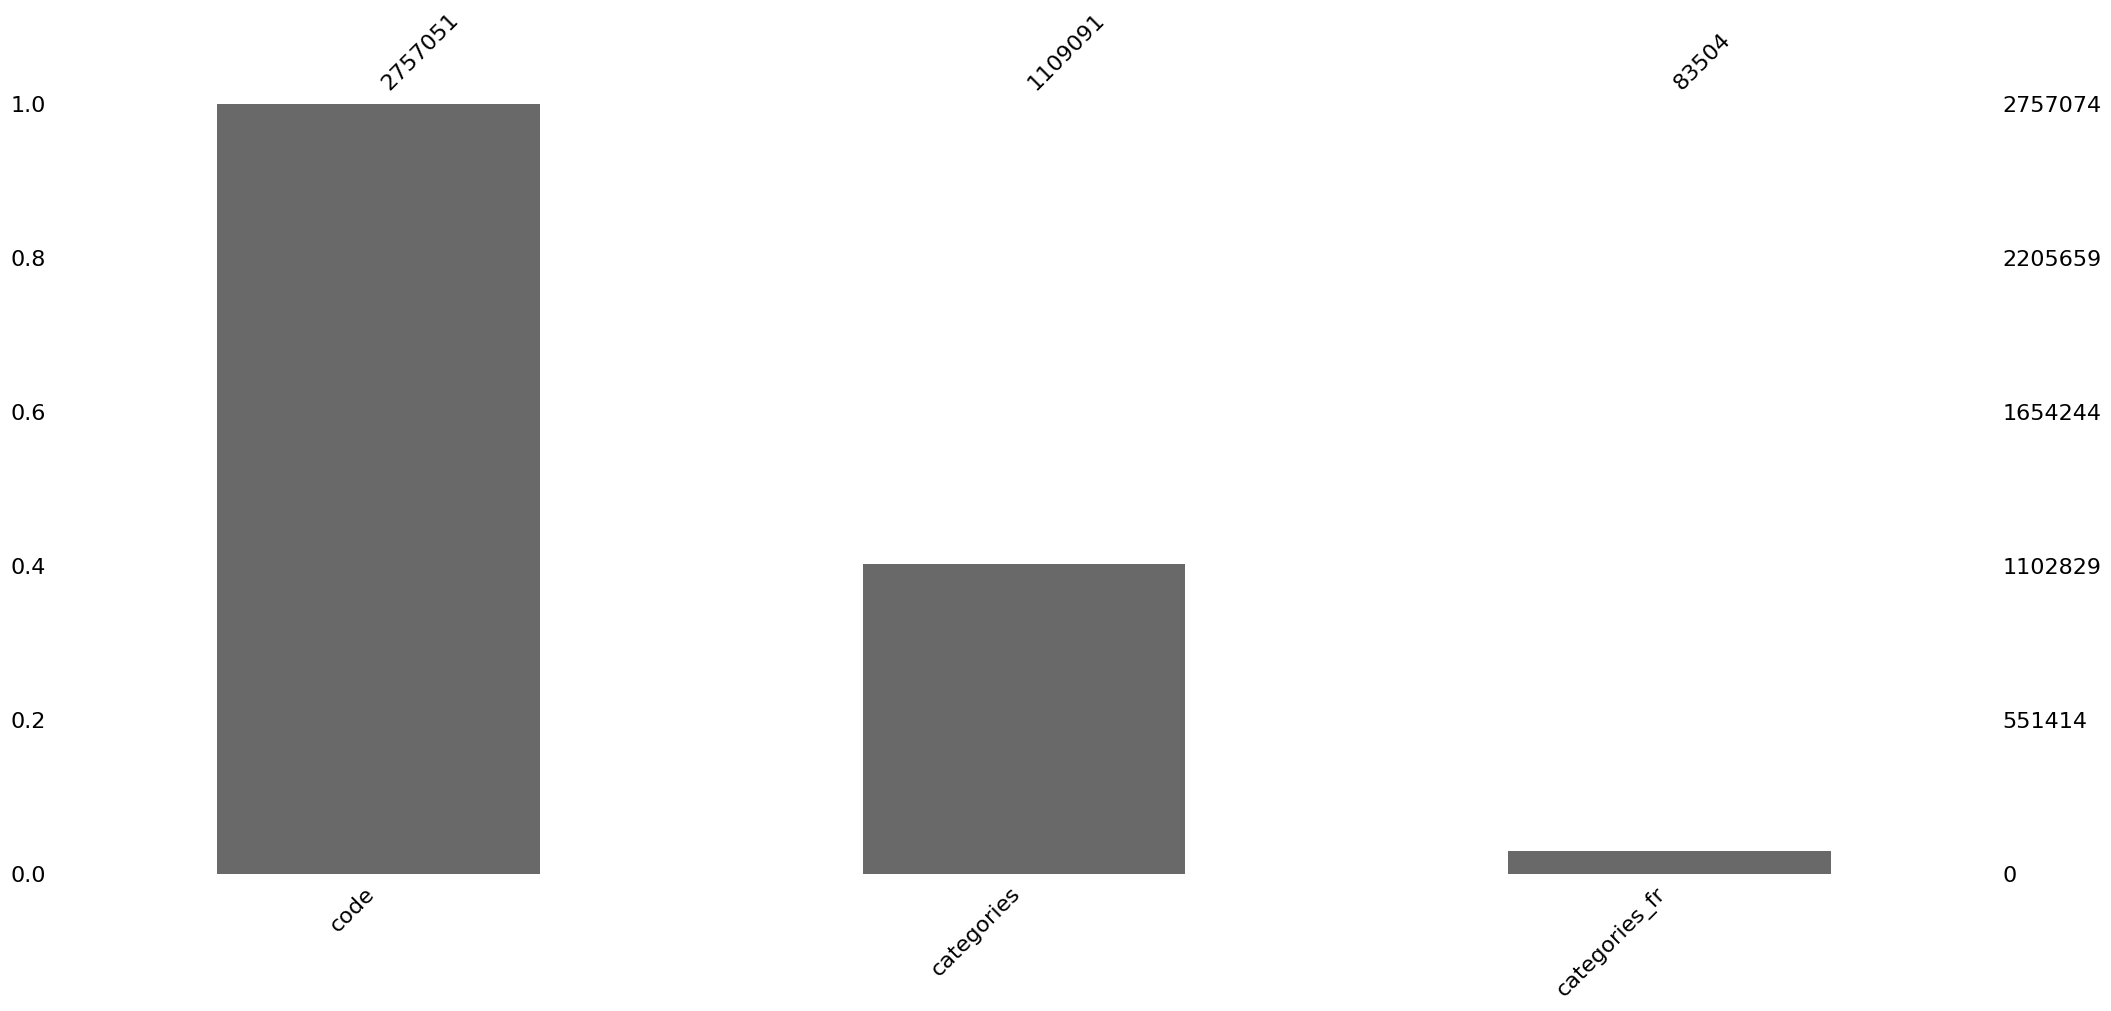

In [66]:
msno.bar(diff)